In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
resultado_p = pd.read_csv('20210330-resultado_preliminar_prova_objetiva.csv')
resultado_f = pd.read_csv('20210406-resultado_final_prova_objetiva.csv')

In [4]:
resultados = pd.merge(resultado_p, resultado_f[['Inscrição', 'Pontuação', 'Classificado']], how='outer', on='Inscrição', suffixes=(' Preliminar', ' Final'))
resultados

,Inscrição,Nome do Candidato,Pontuação Preliminar,Ações Afirmativas,Classificado Preliminar,Pontuação Final,Classificado Final
0,650,Carlos Danilo Tomé,18,NaN,1,19,1
1,834,Lucas Galdino De Camargo,18,NaN,1,19,1
2,976,Vinicius Vieira Albano,18,NaN,1,19,1
3,988,Amanda Rodrigues Da Silva,17,NaN,1,18,1
4,840,Carolina Ensfeld Lueders,17,NaN,1,19,1
...,...,...,...,...,...,...,...
229,735,Maria Aparecida Lopes Dos Santos,2,NaN,0,4,0
230,477,Valdemir Ferreira Dos Santos,2,NaN,0,4,0
231,993,Raquel Ribeiro De Azevedo,2,PPI,0,4,0
232,304,Roberto Cezar Marcelino Neris,0,NaN,0,2,0


## Classificados

In [5]:
print("Total classificados (Preliminar) =", resultados['Classificado Preliminar'].sum())
print("Total classificados (Final) =", resultados['Classificado Final'].sum())

Total classificados (Preliminar) = 64
Total classificados (Final) = 73


In [6]:
corte_p = min(resultados[resultados['Ações Afirmativas'].isna() & resultados['Classificado Preliminar'] == 1]['Pontuação Preliminar'])
corte_f = min(resultados[resultados['Ações Afirmativas'].isna() & resultados['Classificado Final'] == 1]['Pontuação Final'])
print("Nota de corte (Preliminar) =", corte_p)
print("Nota de corte (Final) =", corte_f)

Nota de corte (Preliminar) = 14
Nota de corte (Final) = 15


In [7]:
pd.set_option('display.max_rows', 100)

resultados['Crescimento'] = resultados['Pontuação Final'] - resultados['Pontuação Preliminar']
resultados[resultados['Classificado Final'] == 1].sort_values(by=['Pontuação Final', 'Crescimento', 'Nome do Candidato'], ascending=[False, True, True])

,Inscrição,Nome do Candidato,Pontuação Preliminar,Ações Afirmativas,Classificado Preliminar,Pontuação Final,Classificado Final,Crescimento
0,650,Carlos Danilo Tomé,18,NaN,1,19,1,1
1,834,Lucas Galdino De Camargo,18,NaN,1,19,1,1
2,976,Vinicius Vieira Albano,18,NaN,1,19,1,1
4,840,Carolina Ensfeld Lueders,17,NaN,1,19,1,2
6,705,Daniel Vargas Shimamoto,17,NaN,1,19,1,2
9,524,Mário Mitsuo Akita,17,NaN,1,19,1,2
11,818,Omar Hajime Fidelis,17,NaN,1,19,1,2
12,355,Weld Lucas Cunha,17,NaN,1,19,1,2
3,988,Amanda Rodrigues Da Silva,17,NaN,1,18,1,1
5,702,Catia Michele Tondolo,17,NaN,1,18,1,1


## Distribuição de notas

### Preliminar

In [8]:
resultados['Pontuação Preliminar'].describe()

count    234.000000
mean      10.264957
std        3.863315
min        0.000000
25%        8.000000
50%       10.000000
75%       13.000000
max       18.000000
Name: Pontuação Preliminar, dtype: float64

In [9]:
resultados.groupby(resultados['Pontuação Preliminar']).agg({'Inscrição': 'count', 'Classificado Preliminar': 'sum'}).sort_index(ascending = False)

,Inscrição,Classificado Preliminar
Pontuação Preliminar,,
18,3,3
17,12,12
16,4,4
15,19,19
14,14,14
13,18,1
12,18,2
11,26,4
10,20,0


<AxesSubplot:>

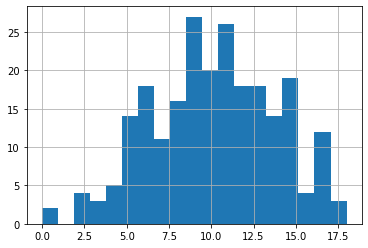

In [26]:
resultados['Pontuação Preliminar'].hist(bins=19)

### Final

In [11]:
resultados['Pontuação Final'].describe()

count    234.000000
mean      12.004274
std        3.798009
min        2.000000
25%        9.000000
50%       12.000000
75%       15.000000
max       19.000000
Name: Pontuação Final, dtype: float64

In [15]:
resultados.groupby(resultados['Pontuação Final']).agg({'Inscrição': 'count', 'Classificado Final': 'sum'}).sort_index(ascending = False)

,Inscrição,Classificado Final
Pontuação Final,,
19,8,8
18,9,9
17,18,18
16,15,15
15,13,13
14,22,2
13,22,3
12,16,1
11,32,4


<AxesSubplot:>

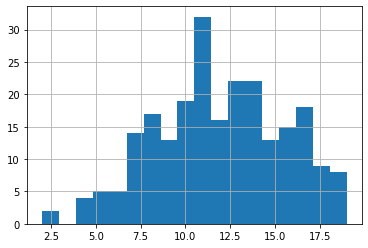

In [24]:
resultados['Pontuação Final'].hist(bins=18)